# InterSim Install and Quick Start

Welcome to the InterSim install tutorial. 

InterSim is designed to be light and easy to use for all researchers. In this tutorial, you will install the environment for InterSim with two popular open dataset [Waymo Open Motion Dataset](https://waymo.com/open) from Waymo and [NuPlan](https://nuplan.org/) by Motional. In the end of this tutorial, you will learn 
1. how to load scenarios and run a single closed-loop simulation with InterSim
2. how to check running simulations on the dashboard
3. how to check simulation results with default metrics
4. how to visualize the simulation results

InterSim only requires a standard Python environment on Linux/Ubuntu/Mac/Windows. Let's get started with setting up your environment.

## Create a new Conda environment

It is a good time for you to create a new Conda environment. 

You might need to open a new terminal, create a new environment, activate it, and run the following commands from there to test instead of running them in this notebook for simplicity. Note to test the environment in this notebook, you need to switch your kernel to your new environment first.

## Install Dataset

InterSim leverages the APIs from the datasets to load data. It is compulsory for you to at least install one dataset to use InterSim. Loading other open or customized datasets requires writing your own dataloader and is beyond the scope of this tutorial.

### With Waymo Open Motion Dataset

Register and download the WOMD dataset (note they have two data formats for you to choose from, please download the **tfexample.tfrecord** files). InterSim loop and load tfexample files in one given folder per simulation. To load WOMD dataset, you only need tensorflow in your environment and you are good. Check with the following import.

In [8]:
import tensorflow as tf

### With NuPlan

Or register and download the NuPlan dataset. There are two folders, one for maps and one for scenarios. To load the NuPlan dataset, you have to make some effort to install the NuPlan's API following their [official install instructions](https://nuplan-devkit.readthedocs.io/en/latest/installation.html). Check with the following import.

In [ ]:
import nuplan

## Install InterSim

To install InterSim, follow the `readme.md` to run `python setup.py install` and you should be good. Note for local simulations with visualization, you need to install Tinker (following the readme file). And you can skip installing Tinker if run InterSim on a server without a hooked monitor. Check with the following import (inside the path of the simulator folder).

In [4]:
import sys
PATH = '../'
sys.path.insert(0, PATH)

In [5]:
import interactive_sim

## Setup the config

You can use the default config setting for a quick run of the simulation. The default config setting is in the config.py file. 

InterSim currently has 3 running modes:

0=debug with per step visualization (Note: you need a monitor for this mode)
1=batch simulation without per step visualization
2=load playback and visualize with Python

Set the running mode by changing the `running_mode` and set the dataset by changing the `dataset` in the config.py file. Specify the dataset location by changing `tf_example_dir` for WOMD or changing paths in the `data_path` for NuPlan.

Now change the save_log_every_scenario in the config.py to True to save logs and playbacks. We will talk about other settings in the following sections or other tutorials when we need to change them.

## Run a quick simulation with default planners

You can run a quick simulation with either mode 0 or 1 with either WOMD or NuPlan dataset, depending on which you installed and downloaded before, by running the following command in your terminal in the `8sBeta` folder.

`python sim.py --max_scenarios 5`

This command will run a quick series of simualtions covering 5 scenarios. InterSim will print simulation results with our default metrics after the simulation is finished. You should see this message printed in the end if no error occured.

"Simulation Finished!"

## Check results

The default path for simulation results is `./sim_result/`. Inside this folder, you should see a folder named after the starting time of your simulation in a month-day-hour-minute format. The simulation results are orgnized in the following way:

```
sim_result
│   sim_rst_xxx.log
└───playback
│   │   xxx00001.playback
│   │   xxx00002.playback
│   │   ...
└───json
    │   xxx00001.json
    │   xxx00002.json
    │   ...    
```

Next, let's check the simulation results on the dashboard. For InterSim Beta, you would need to launch a local server with flask for python server and npm for html+javascript client on your browser. Install the following depencencies to use our browser visualizations.

- [npm](https://docs.npmjs.com/downloading-and-installing-node-js-and-npm)
- [flask](https://flask.palletsprojects.com/en/2.2.x/installation/#)
- [flask-cors](https://flask-cors.readthedocs.io/en/latest/)

Run `flask --app dashboard_server run` to launch the Python server in your terminal. And then travel to the `dashboard` by `cd ../dashboard` from the `8sBeta` folder and run `npm run dev` to fire a local client of the dashboard on your default browser. The default ip for the Python server is http://127.0.0.1:5000. Use `flask --app dashboard_server run --host=0.0.0.0 --port=80` to specify another ip address or port.

After the running npm command, you should see the index page pop up as the follows. You should be able to see one and only one simulation, which is the one you just ran, in the list. Let's click the dropdown button and click details to check all scenarios ran in this simulation.

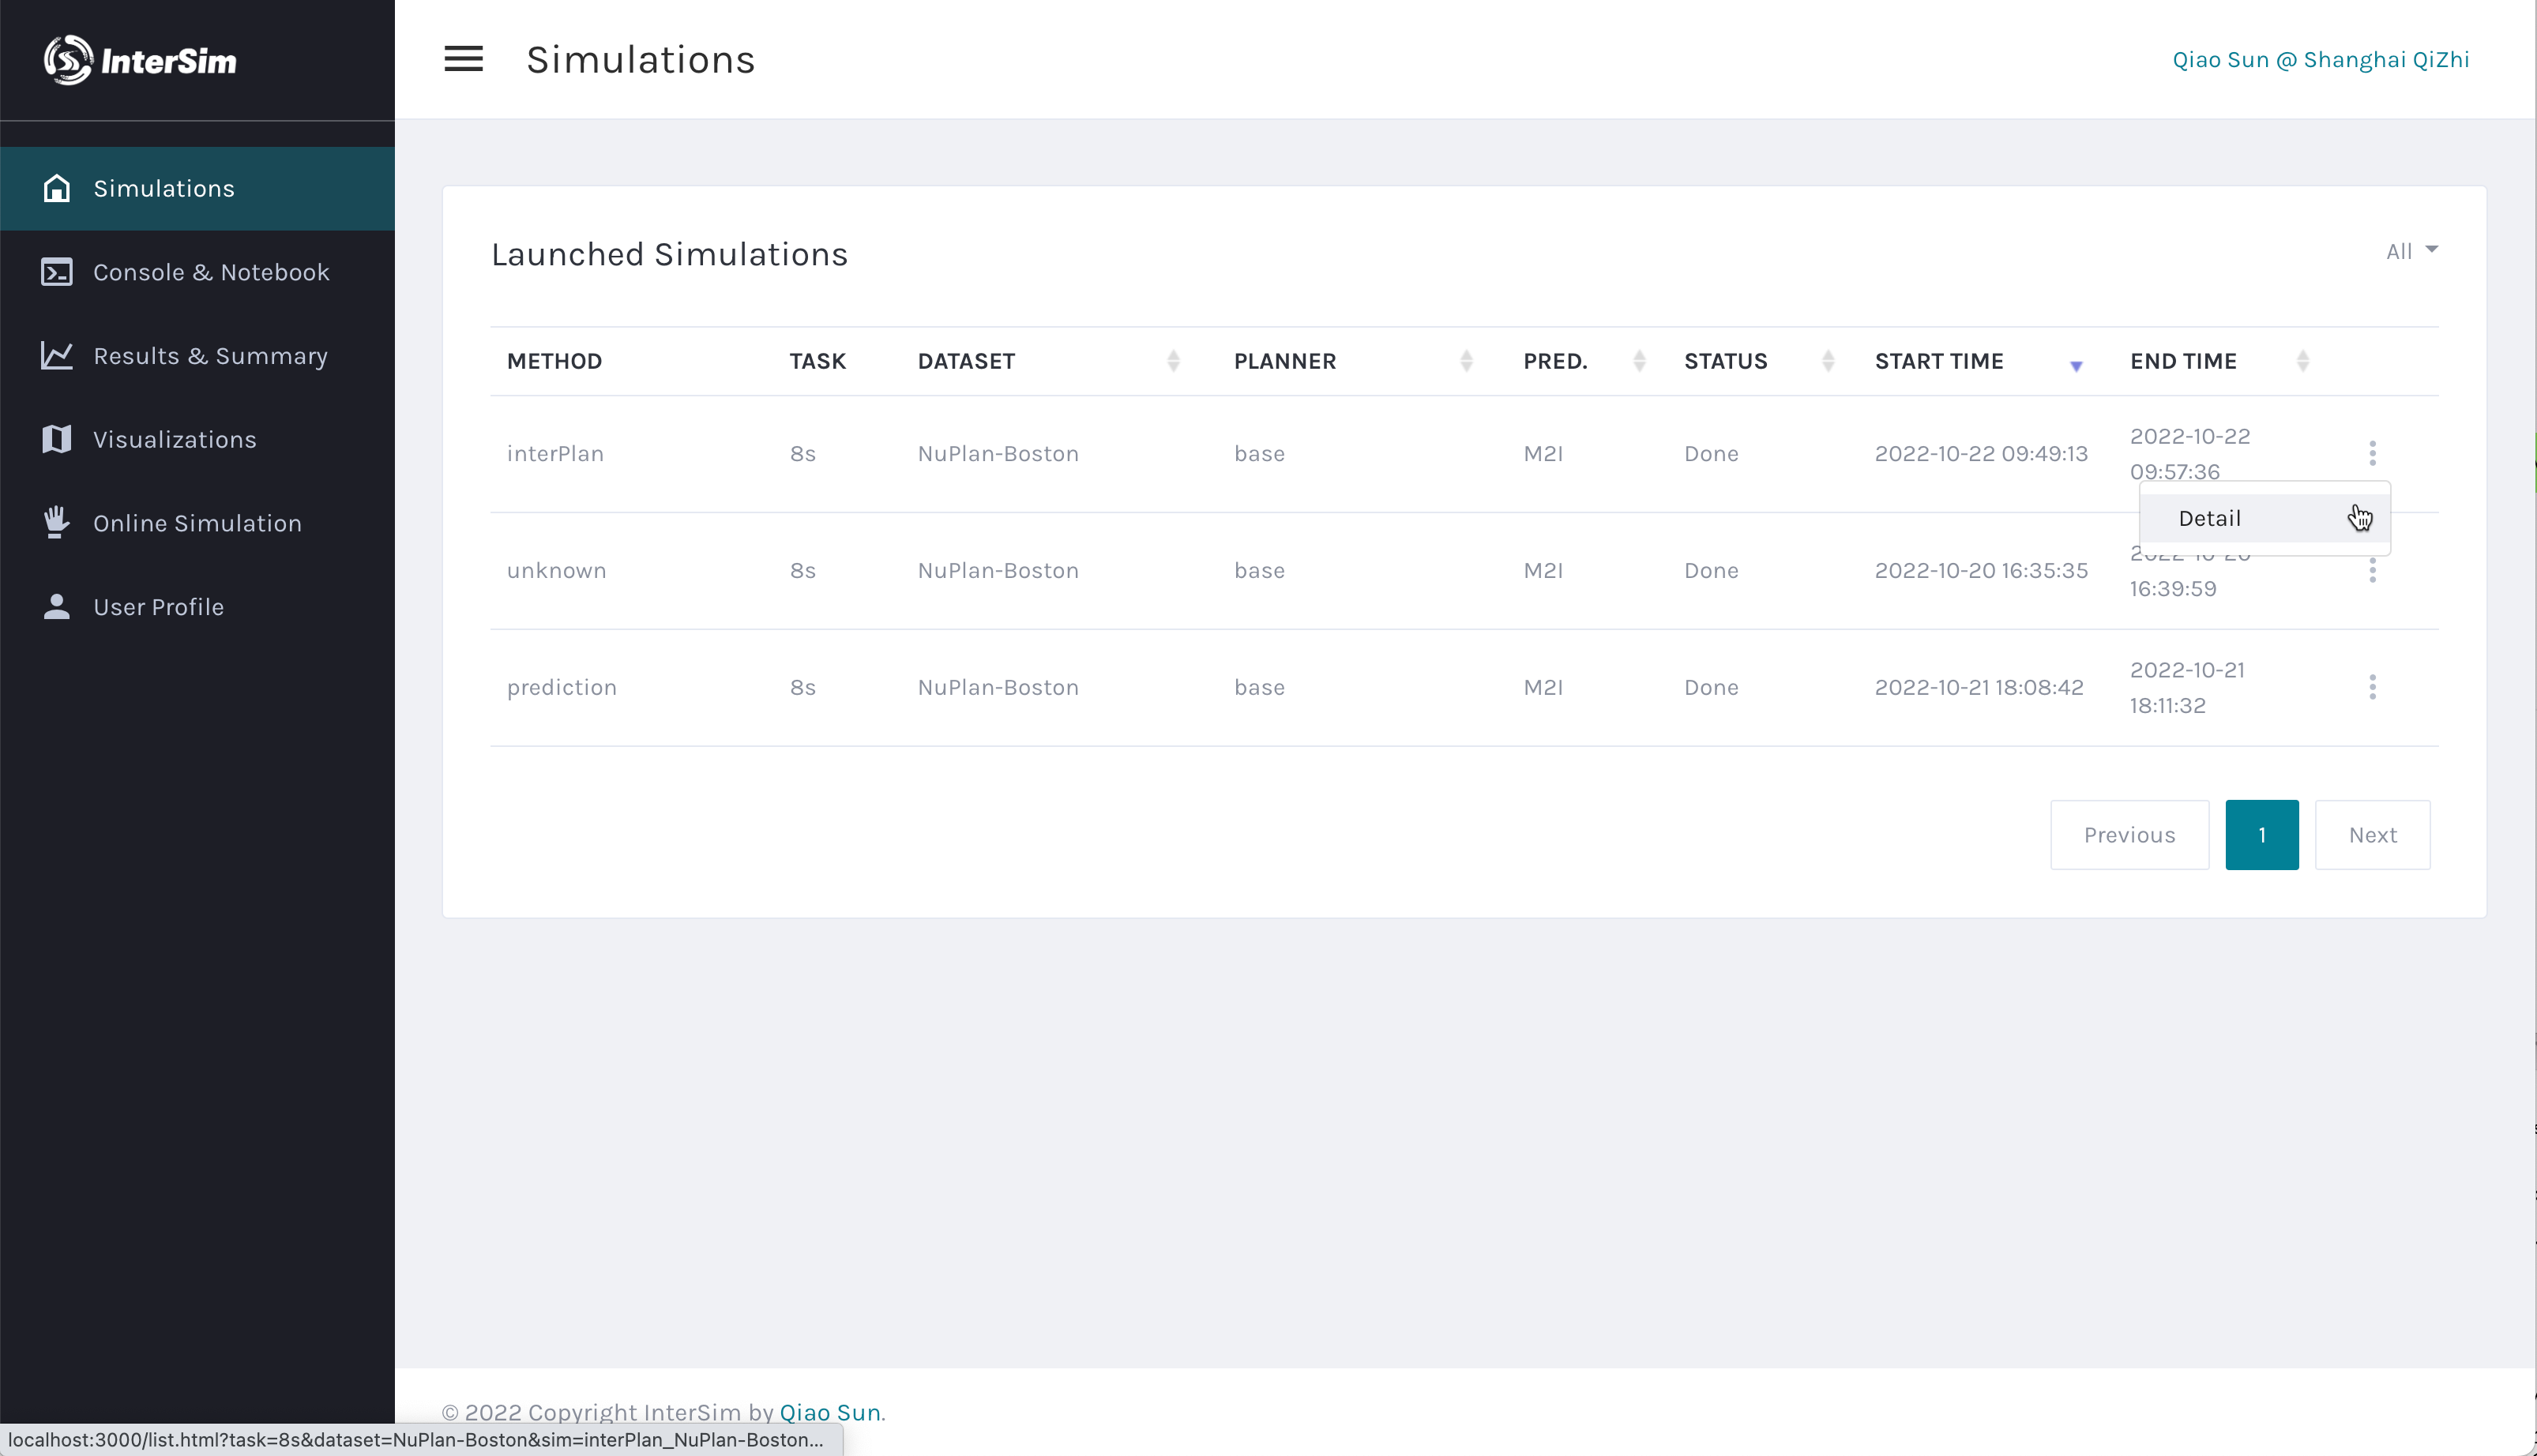

The link should direct you to the Results & Summary page as shown below. All scenarios in this simulation are listed with there breif summaries. Click the dropdown button and click the visaulize to show this scenario in details.

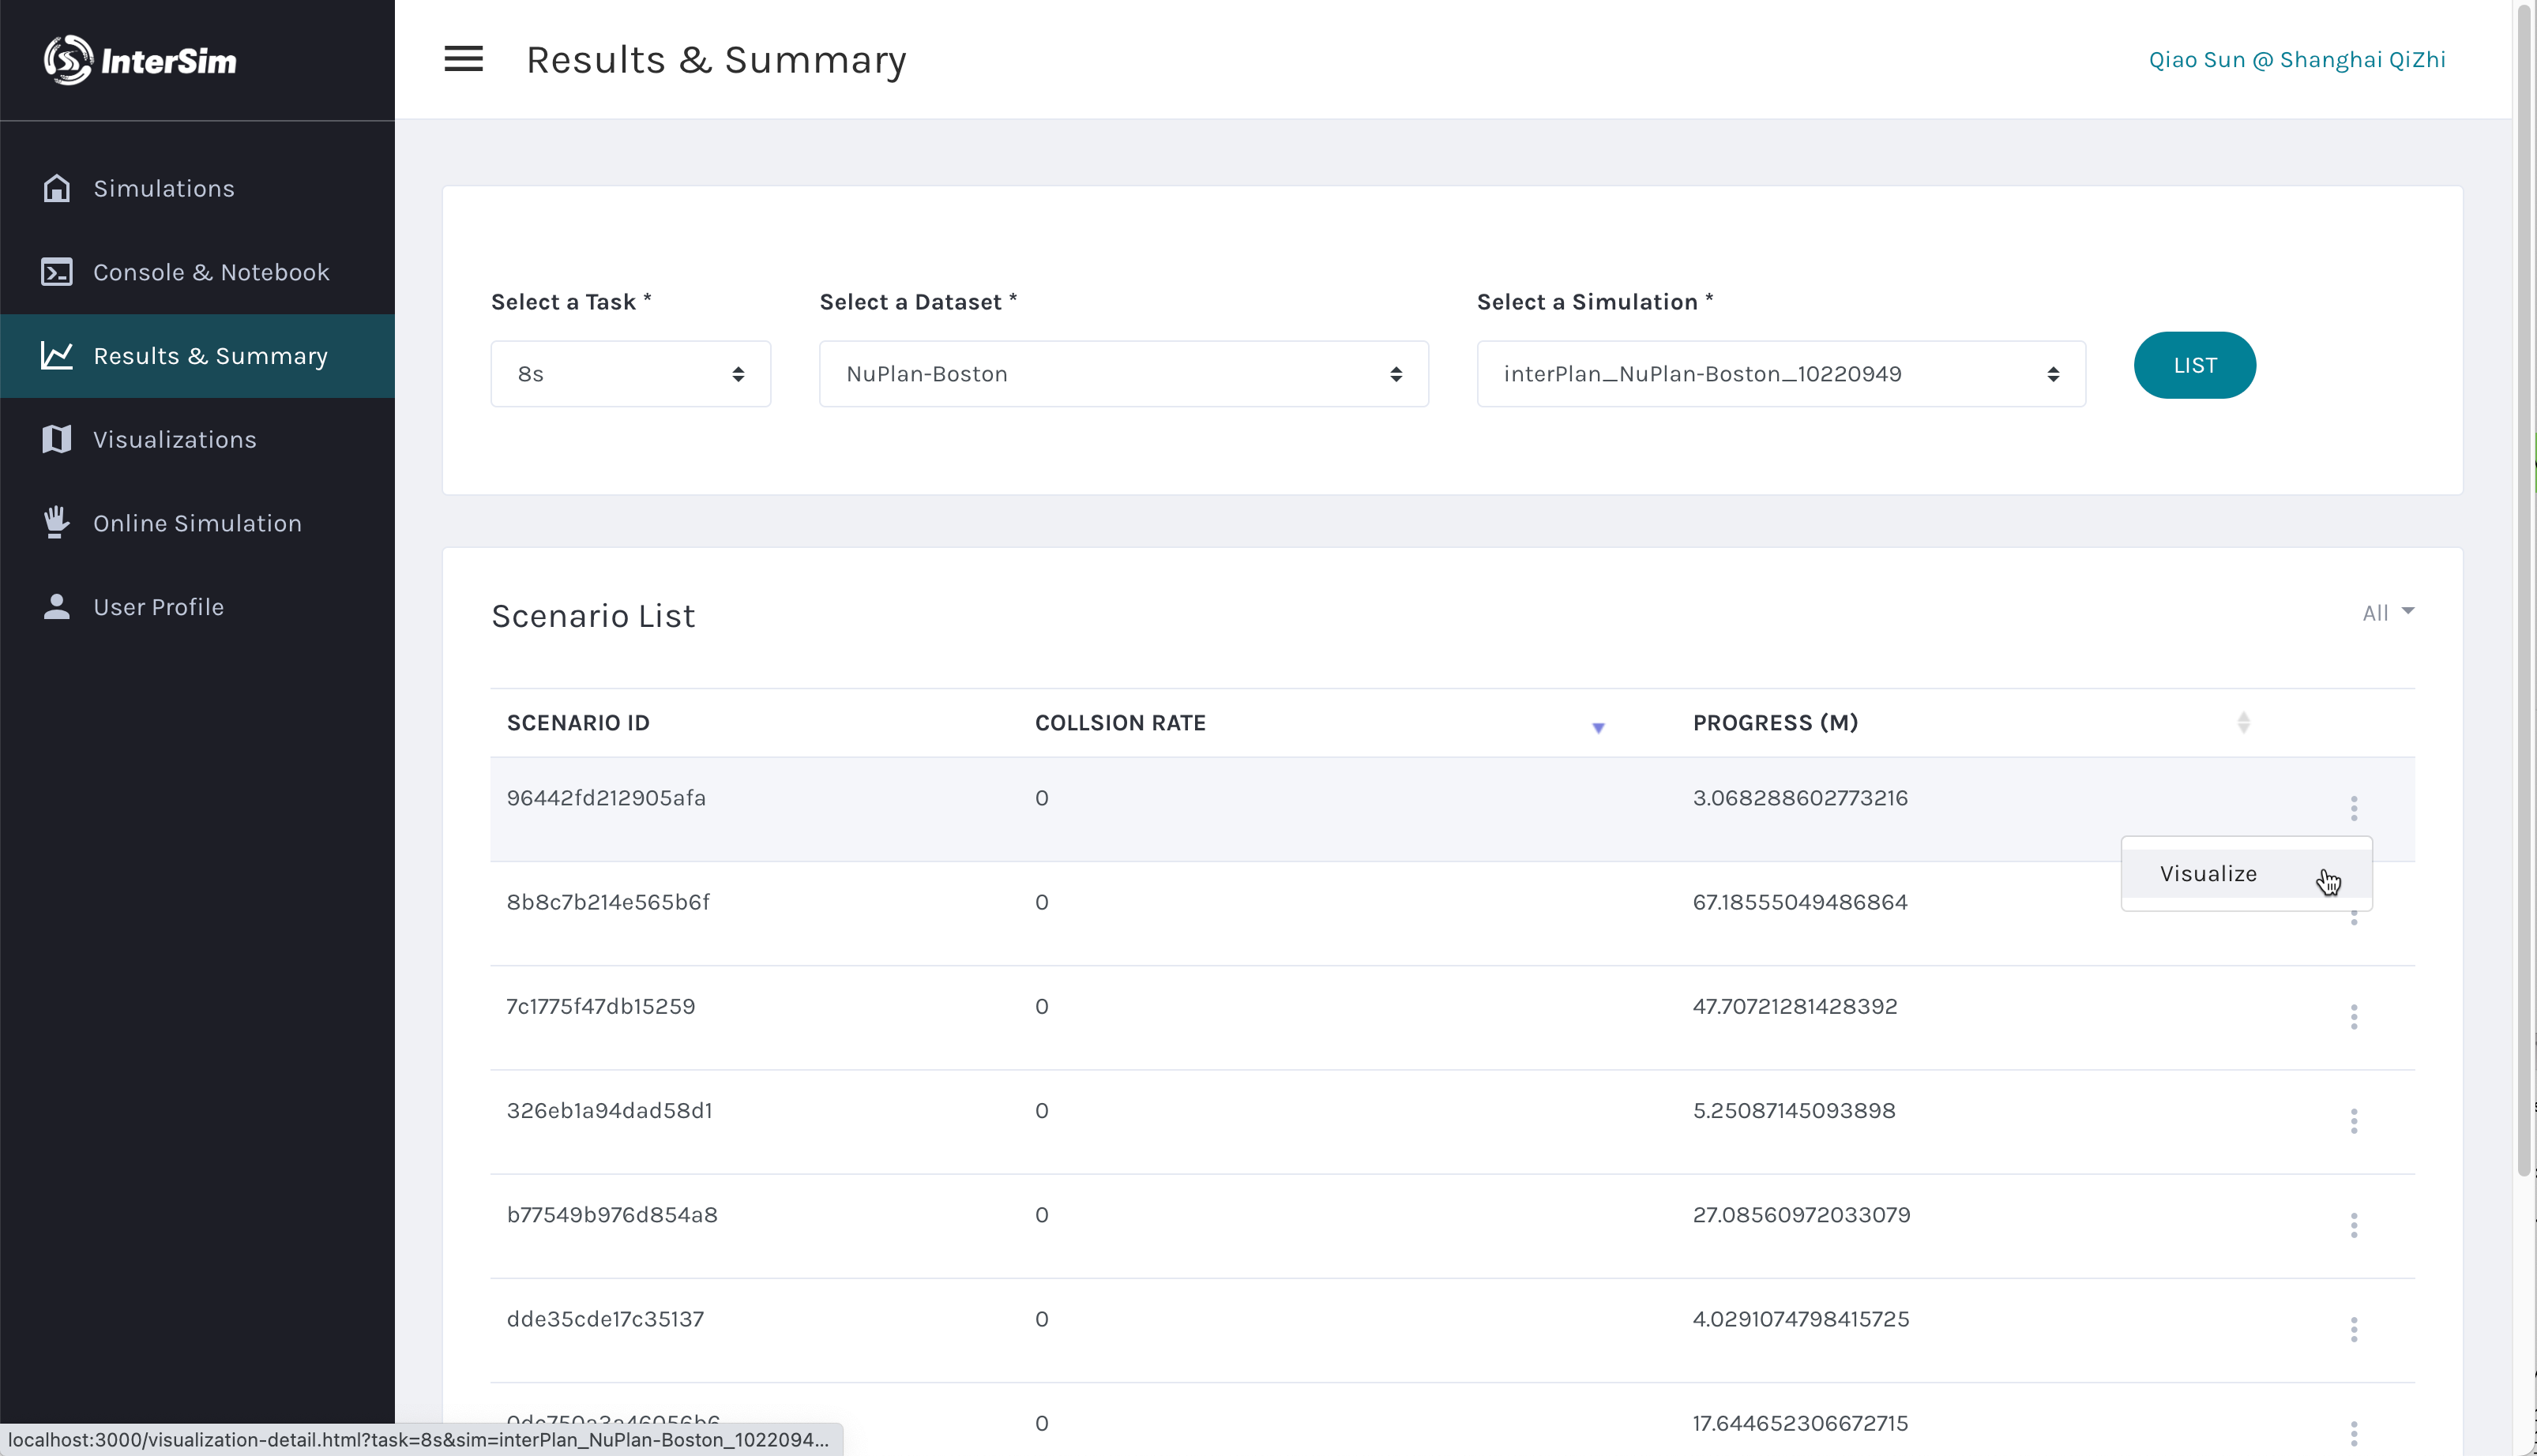

And this link should direct you to the visualization page as shown below. Click the play button in the middle of the bottom to play this scenario.

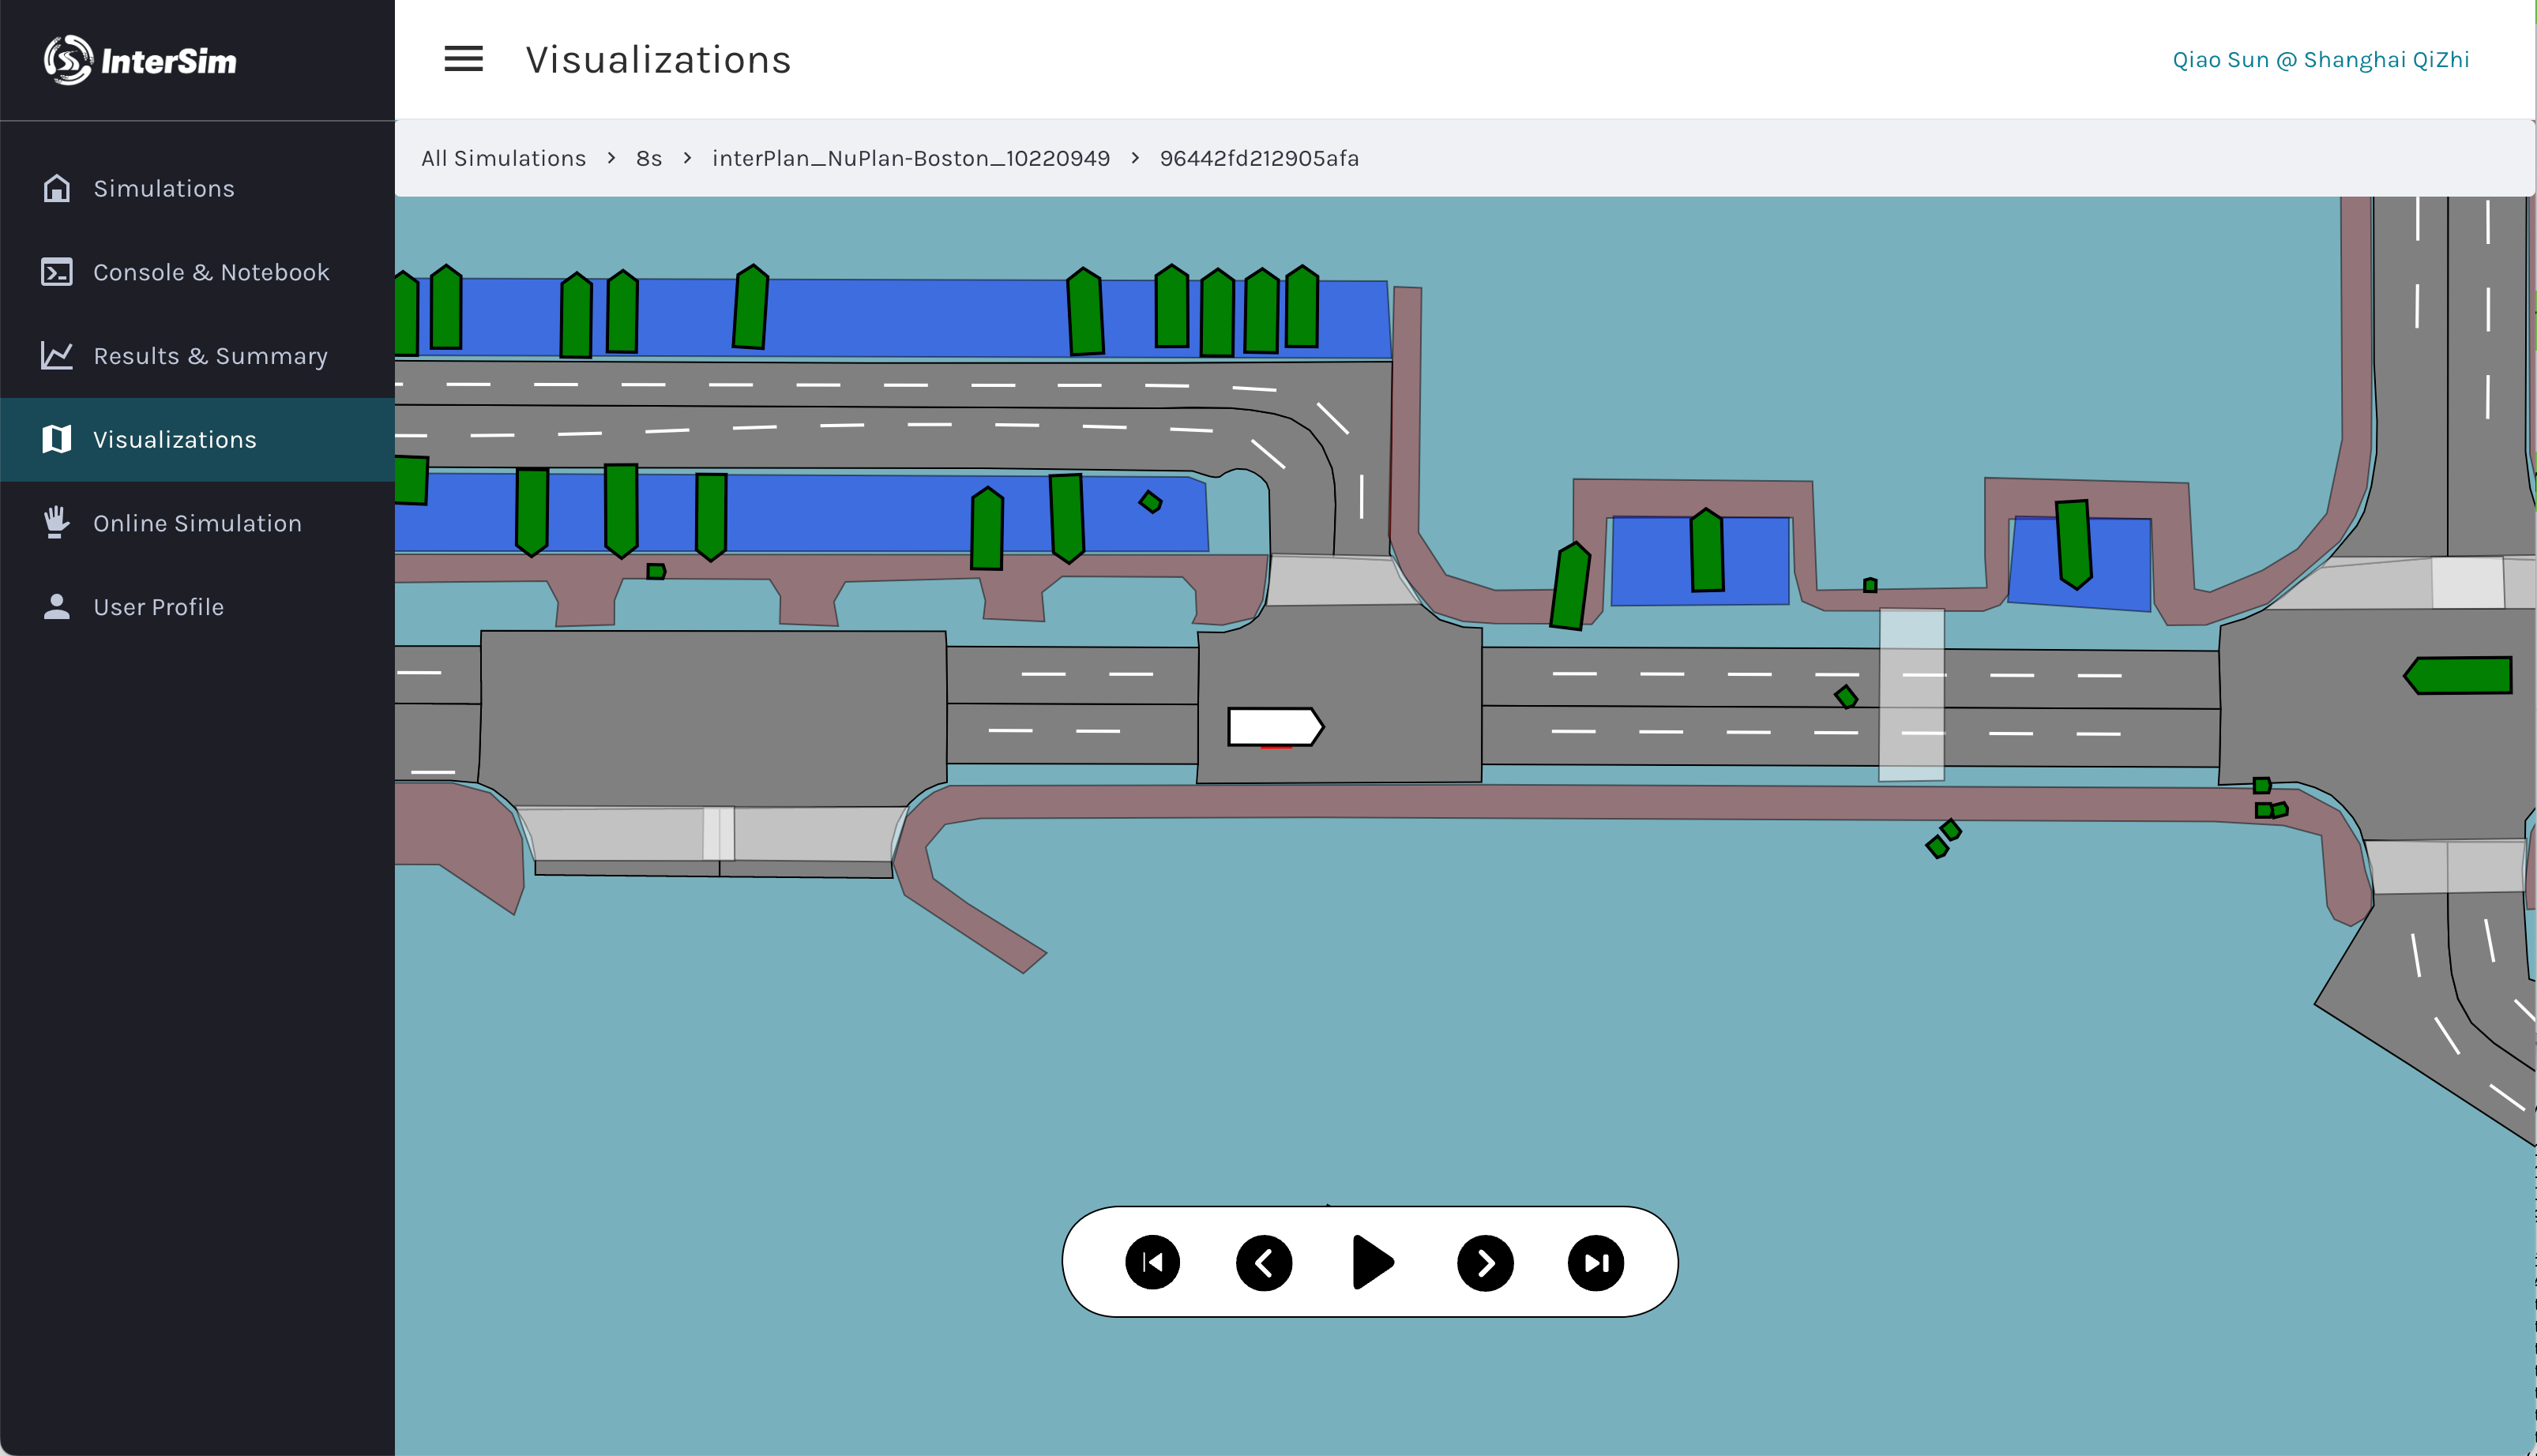

## Summary

We have reach the end of this tutorial and now you are ready to test your planners with InterSim. Follow the next tutorial to plug your planner into InterSim for closed-loop simulations.

## Known Issues

It is still the early stage of the beta version. We are short of hands to solve the following known issues:

- Browser visualization only support NuPlan with the map of Boston
- Browser dashboard only list simulations in the default folder, to search another folder, you will need to change the path in the javascript code
- Console & Notebook, Online Simulation, and User Profile are pages not ready to release yet